In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data=pd.read_excel("TemperatureForecasting.xlsx")
data.head()

,Slno,datetime,conditions,winddir,visibility,temp,windspeed,pressure,humidity,dewpoint,time,date
0,1,2006-01-01T21:00:00Z,overcast,ssw,NaN,60,13.8,30.02,62,50,21:00:00,2006-01-01
1,2,2006-01-01T18:00:00Z,unknown precipitation,ssw,NaN,60,12.7,29.95,76,54,18:00:00,2006-01-01
2,3,2006-01-01T15:00:00Z,unknown precipitation,sw,3.0,61,19.6,29.90,91,59,15:00:00,2006-01-01
3,4,2006-01-01T12:00:00Z,NaN,west,NaN,78,16.1,29.76,49,62,12:00:00,2006-01-01
4,5,2006-01-01T09:00:00Z,NaN,nw,NaN,78,4.6,29.68,43,59,09:00:00,2006-01-01


In [7]:
data.isnull().fillna(np.nan);
data.isnull().sum()

Slno              0
datetime          0
conditions    25795
winddir           0
visibility    33140
temp              0
windspeed      1871
pressure        361
humidity          0
dewpoint          0
time              0
date              0
dtype: int64

In [8]:
data_df=pd.DataFrame(data.iloc[:,[1,5]])
data_df.head()
data_df.datetime=pd.to_datetime(data.datetime)
data_df.index =data_df.datetime
data_df.head()
data_df= data_df.resample('D').mean()
data_df.info()
data_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4068 entries, 2006-01-01 to 2017-02-19
Freq: D
Data columns (total 1 columns):
temp    3684 non-null float64
dtypes: float64(1)
memory usage: 63.6 KB


temp    384
dtype: int64

In [9]:
data_df.head()

,temp
datetime,
2006-01-01,70.250
2006-01-02,62.375
2006-01-03,62.250
2006-01-04,60.000
2006-01-05,62.000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35319 entries, 0 to 35318
Data columns (total 12 columns):
Slno          35319 non-null int64
datetime      35319 non-null object
conditions    9524 non-null object
winddir       35319 non-null object
visibility    2179 non-null float64
temp          35319 non-null int64
windspeed     33448 non-null float64
pressure      34958 non-null float64
humidity      35319 non-null int64
dewpoint      35319 non-null int64
time          35319 non-null object
date          35319 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 2.7+ MB


In [11]:

new_df=pd.DataFrame(data.iloc[:,1])
new_df.head(20)



,datetime
0,2006-01-01T21:00:00Z
1,2006-01-01T18:00:00Z
2,2006-01-01T15:00:00Z
3,2006-01-01T12:00:00Z
4,2006-01-01T09:00:00Z
5,2006-01-01T06:00:00Z
6,2006-01-01T03:00:00Z
7,2006-01-01T00:00:00Z
8,2006-01-02T21:00:00Z
9,2006-01-02T18:00:00Z


In [12]:
data.drop(['Slno'],axis=1, inplace=True)
data.drop(['visibility'],axis=1, inplace=True)
data.drop(['conditions'],axis=1, inplace=True)
data.drop(['datetime'],axis=1,inplace=True)
data.drop(['date'],axis=1,inplace=True)
data.drop(['time'],axis=1,inplace=True)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35319 entries, 0 to 35318
Data columns (total 6 columns):
winddir      35319 non-null object
temp         35319 non-null int64
windspeed    33448 non-null float64
pressure     34958 non-null float64
humidity     35319 non-null int64
dewpoint     35319 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
data.isnull().sum()

winddir         0
temp            0
windspeed    1871
pressure      361
humidity        0
dewpoint        0
dtype: int64

In [15]:
from sklearn.preprocessing import Imputer
imputer=Imputer()
data.iloc[:,3:4] = imputer.fit_transform(data.iloc[:,3:4])
data.iloc[:,2:3] = imputer.fit_transform(data.iloc[:,2:3])
data_df.iloc[:,:] = imputer.fit_transform(data_df.iloc[:,:])

/usr/local/lib/python3.4/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
data.head()

,winddir,temp,windspeed,pressure,humidity,dewpoint
0,ssw,60,13.8,30.02,62,50
1,ssw,60,12.7,29.95,76,54
2,sw,61,19.6,29.90,91,59
3,west,78,16.1,29.76,49,62
4,nw,78,4.6,29.68,43,59


In [17]:
data.head()



,winddir,temp,windspeed,pressure,humidity,dewpoint
0,ssw,60,13.8,30.02,62,50
1,ssw,60,12.7,29.95,76,54
2,sw,61,19.6,29.90,91,59
3,west,78,16.1,29.76,49,62
4,nw,78,4.6,29.68,43,59


In [18]:

data.isnull().sum()

winddir      0
temp         0
windspeed    0
pressure     0
humidity     0
dewpoint     0
dtype: int64

from sklearn.linear_model import LinearRegression
clf=LinearRegression()

data_without_null=data.dropna()
data_without_null.head()
data_without_null.isnull().sum()
X_train=data_without_null.iloc[:,[1,3,4,5]]
X_train.head()Y_train=data_without_null.iloc[:,[2]]
Y_train.head()
clf.fit(X_train,Y_train)
X_test =data.iloc[:,[1,3,4,5]]
data.iloc[:, [2]].head(25)
Y_pred=pd.DataFrame(clf.predict(X_test))
Y_pred.head(25)
new_data=np.array(data)
#new_data[2].fillna(Y_pred.iloc[0], inplace=True)
data.iloc[2].fillna(Y_pred.iloc[0], inplace=True)
data.isnull().sum()


In [19]:
data.head()

,winddir,temp,windspeed,pressure,humidity,dewpoint
0,ssw,60,13.8,30.02,62,50
1,ssw,60,12.7,29.95,76,54
2,sw,61,19.6,29.90,91,59
3,west,78,16.1,29.76,49,62
4,nw,78,4.6,29.68,43,59


import time
from datetime import datetime
new_data=np.array(data)
new_data[:,6]

In [20]:
data.dtypes

winddir       object
temp           int64
windspeed    float64
pressure     float64
humidity       int64
dewpoint       int64
dtype: object

In [21]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data.iloc[:,[0]]=label_encoder.fit_transform(data.iloc[:,[0]])
data.head()




/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,winddir,temp,windspeed,pressure,humidity,dewpoint
0,12,60,13.8,30.02,62,50
1,12,60,12.7,29.95,76,54
2,13,61,19.6,29.90,91,59
3,14,78,16.1,29.76,49,62
4,8,78,4.6,29.68,43,59


In [22]:
data.dtypes

winddir        int32
temp           int64
windspeed    float64
pressure     float64
humidity       int64
dewpoint       int64
dtype: object

In [23]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0],sparse=False)
data=ohe.fit_transform(data)
data

/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0.  ,  0.  ,  0.  , ..., 30.02, 62.  , 50.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.95, 76.  , 54.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.9 , 91.  , 59.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 29.85, 55.  , 43.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.88, 49.  , 43.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.88, 47.  , 44.  ]])

In [24]:
data=pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0


In [25]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0


In [26]:
data=pd.concat([data, new_df], axis=1)


In [27]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,datetime
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0,2006-01-01T21:00:00Z
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0,2006-01-01T18:00:00Z
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0,2006-01-01T15:00:00Z
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0,2006-01-01T12:00:00Z
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0,2006-01-01T09:00:00Z


In [28]:
data.rename(columns={17:'temp',18:'windspeed',19:'pressure',20:'humidity',21:'dewpoint'}, inplace=True)


In [29]:
data.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,temp,windspeed,pressure,humidity,dewpoint,datetime
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0,2006-01-01T21:00:00Z
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0,2006-01-01T18:00:00Z
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0,2006-01-01T15:00:00Z
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0,2006-01-01T12:00:00Z
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0,2006-01-01T09:00:00Z


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35319 entries, 0 to 35318
Data columns (total 23 columns):
0            35319 non-null float64
1            35319 non-null float64
2            35319 non-null float64
3            35319 non-null float64
4            35319 non-null float64
5            35319 non-null float64
6            35319 non-null float64
7            35319 non-null float64
8            35319 non-null float64
9            35319 non-null float64
10           35319 non-null float64
11           35319 non-null float64
12           35319 non-null float64
13           35319 non-null float64
14           35319 non-null float64
15           35319 non-null float64
16           35319 non-null float64
temp         35319 non-null float64
windspeed    35319 non-null float64
pressure     35319 non-null float64
humidity     35319 non-null float64
dewpoint     35319 non-null float64
datetime     35319 non-null object
dtypes: float64(22), object(1)
memory usage: 6.1+ MB


In [31]:
data.iloc[:,22]=pd.to_datetime(data.iloc[:,22])

In [32]:
data.isnull().sum()

0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
temp         0
windspeed    0
pressure     0
humidity     0
dewpoint     0
datetime     0
dtype: int64

In [33]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,temp,windspeed,pressure,humidity,dewpoint,datetime
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0,2006-01-01 21:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0,2006-01-01 18:00:00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0,2006-01-01 15:00:00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0,2006-01-01 12:00:00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0,2006-01-01 09:00:00


In [34]:
data.index = data.datetime
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,temp,windspeed,pressure,humidity,dewpoint,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
2006-01-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0,2006-01-01 21:00:00
2006-01-01 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0,2006-01-01 18:00:00
2006-01-01 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0,2006-01-01 15:00:00
2006-01-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0,2006-01-01 12:00:00
2006-01-01 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0,2006-01-01 09:00:00


In [35]:
data.head()
data.isnull().sum()

0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
temp         0
windspeed    0
pressure     0
humidity     0
dewpoint     0
datetime     0
dtype: int64

In [36]:
data = data.resample('D').mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4068 entries, 2006-01-01 to 2017-02-19
Freq: D
Data columns (total 22 columns):
0            3684 non-null float64
1            3684 non-null float64
2            3684 non-null float64
3            3684 non-null float64
4            3684 non-null float64
5            3684 non-null float64
6            3684 non-null float64
7            3684 non-null float64
8            3684 non-null float64
9            3684 non-null float64
10           3684 non-null float64
11           3684 non-null float64
12           3684 non-null float64
13           3684 non-null float64
14           3684 non-null float64
15           3684 non-null float64
16           3684 non-null float64
temp         3684 non-null float64
windspeed    3684 non-null float64
pressure     3684 non-null float64
humidity     3684 non-null float64
dewpoint     3684 non-null float64
dtypes: float64(22)
memory usage: 731.0 KB


In [37]:
#data.dropna(inplace=True)
data.iloc[:,:] = imputer.fit_transform(data.iloc[:,:])
#data.iloc[:,2:3] = imputer.fit_transform(data.iloc[:,2:3])
data.head()
data.isnull().sum()

0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
temp         0
windspeed    0
pressure     0
humidity     0
dewpoint     0
dtype: int64

In [38]:

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4068 entries, 2006-01-01 to 2017-02-19
Freq: D
Data columns (total 22 columns):
0            4068 non-null float64
1            4068 non-null float64
2            4068 non-null float64
3            4068 non-null float64
4            4068 non-null float64
5            4068 non-null float64
6            4068 non-null float64
7            4068 non-null float64
8            4068 non-null float64
9            4068 non-null float64
10           4068 non-null float64
11           4068 non-null float64
12           4068 non-null float64
13           4068 non-null float64
14           4068 non-null float64
15           4068 non-null float64
16           4068 non-null float64
temp         4068 non-null float64
windspeed    4068 non-null float64
pressure     4068 non-null float64
humidity     4068 non-null float64
dewpoint     4068 non-null float64
dtypes: float64(22)
memory usage: 731.0 KB


Text(0.5,1,'Seasonal change')

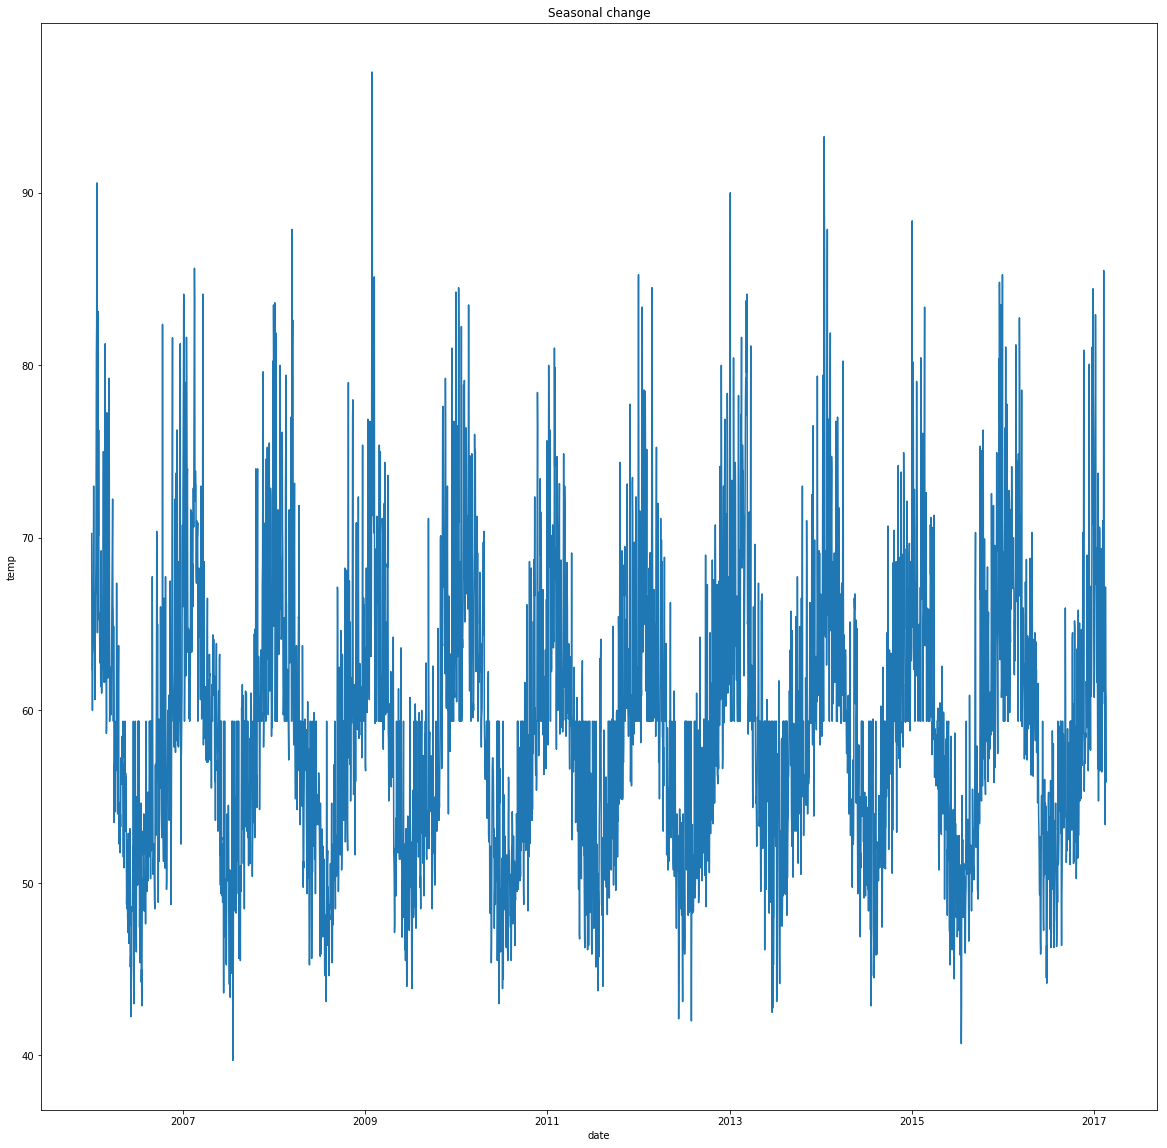

In [39]:
plt.figure(figsize=(20,20))
plt.plot(data.iloc[:,17])
plt.xlabel('date')
plt.ylabel('temp')
plt.title('Seasonal change')


In [40]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,temp,windspeed,pressure,humidity,dewpoint
datetime,,,,,,,,,,,,,,,,,,,,,
2006-01-01,0.125,0.0,0.125,0.0,0.0,0.0,0.125,0.0,0.125,0.000,...,0.250,0.125,0.125,0.00,0.000,70.250,11.127473,29.76375,59.125,57.375
2006-01-02,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.125,...,0.125,0.250,0.000,0.00,0.125,62.375,9.512500,30.00375,49.875,48.000
2006-01-03,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,...,0.250,0.125,0.125,0.25,0.125,62.250,13.387500,30.00250,52.500,48.500
2006-01-04,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.250,...,0.250,0.000,0.000,0.00,0.000,60.000,12.375000,30.06375,43.375,43.500
2006-01-05,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.375,...,0.125,0.125,0.000,0.00,0.000,62.000,9.675000,29.99625,49.125,46.875


In [37]:
df=pd.DataFrame(data.temp)

In [38]:

Y_train=pd.DataFrame(data.temp[:3600])
Y_test=pd.DataFrame(data.temp[3600:])
Y_train.tail()
Y_test.tail()


,temp
datetime,
2017-02-15,53.375000
2017-02-16,67.153846
2017-02-17,61.250000
2017-02-18,60.714286
2017-02-19,55.857143


Text(0,0.5,'tempearture')

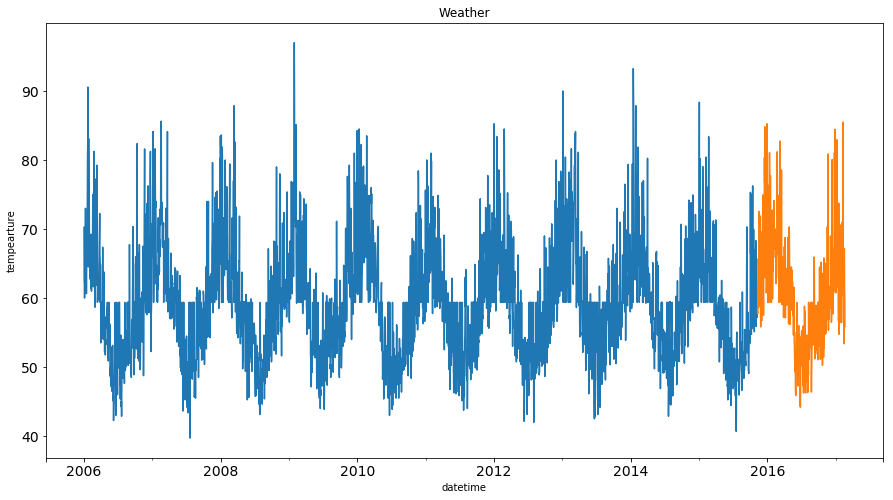

In [39]:
Y_train.temp.plot(figsize=(15,8), title= 'Weather', fontsize=14)
Y_test.temp.plot(figsize=(15,8), title= 'Weather', fontsize=14)
plt.ylabel("tempearture")

In [40]:
#naive_forecast

Y_data= np.asarray(Y_train.temp)
Y_pred_naive = Y_test.copy()
Y_pred_naive['naive'] = Y_data[len(Y_data)-1]
Y_pred_naive.head()
Y_data[len(Y_data)-1]

59.373135995082244

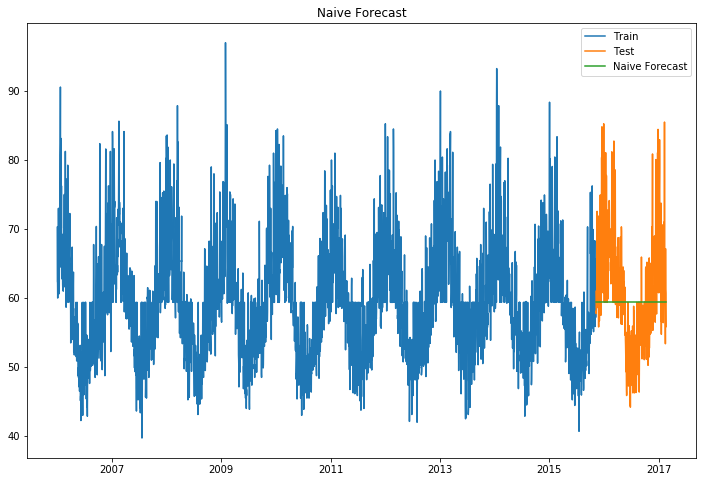

In [41]:
plt.figure(figsize=(12,8))
plt.plot(Y_train.index, Y_train['temp'], label='Train')
plt.plot(Y_test.index,Y_test['temp'], label='Test')
plt.plot(Y_pred_naive.index,Y_pred_naive['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test.temp, Y_pred_naive.naive))
print(rms)


8.1491388663


In [43]:
#average_forecast

Y_pred_avg=Y_test.copy()
Y_pred_avg['Average_Forecast']=Y_train['temp'].mean()

In [44]:
Y_pred_avg.head()

,temp,Average_Forecast
datetime,,
2015-11-10,58.0625,59.173622
2015-11-11,57.7500,59.173622
2015-11-12,61.0625,59.173622
2015-11-13,59.7500,59.173622
2015-11-14,58.5625,59.173622


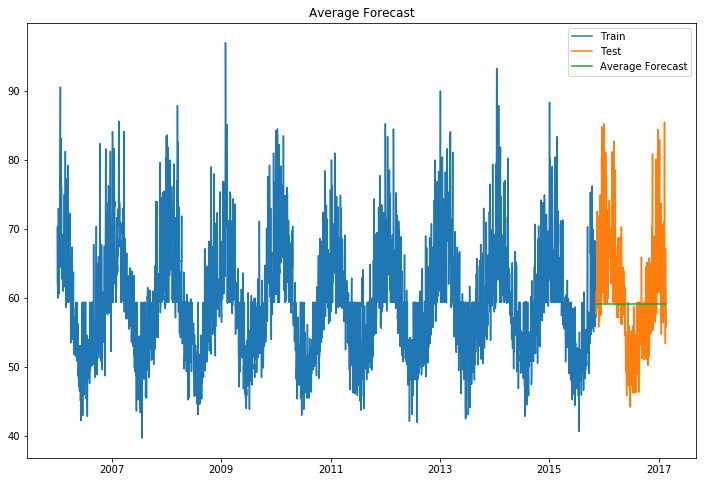

In [45]:
plt.figure(figsize=(12,8))
plt.plot(Y_train.index, Y_train['temp'], label='Train')
plt.plot(Y_test.index,Y_test['temp'], label='Test')
plt.plot(Y_pred_avg.index,Y_pred_avg['Average_Forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.title("Average Forecast")
plt.show()

In [46]:
rms_avg = sqrt(mean_squared_error(Y_test.temp, Y_pred_avg.Average_Forecast))
print(rms_avg)

8.18905790908


In [47]:
#moving_average_forecast

Y_pred_m_avg=Y_test.copy()
Y_pred_m_avg['Moving_average']=Y_train['temp'].rolling(1000).mean().iloc[-1]

Y_pred_m_avg.head()

,temp,Moving_average
datetime,,
2015-11-10,58.0625,59.131475
2015-11-11,57.7500,59.131475
2015-11-12,61.0625,59.131475
2015-11-13,59.7500,59.131475
2015-11-14,58.5625,59.131475


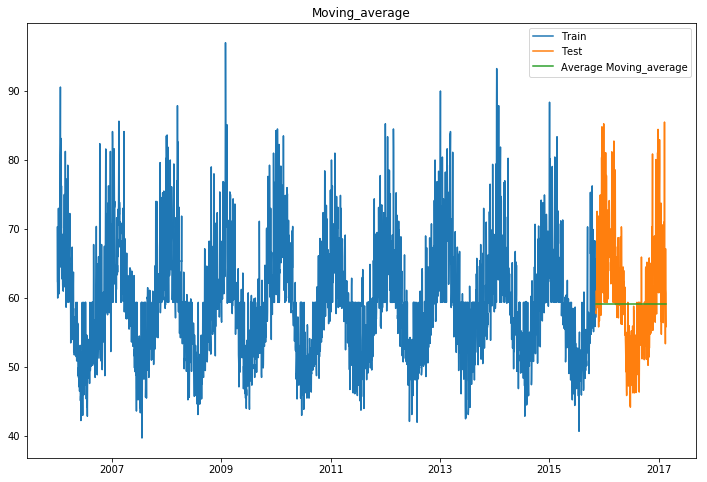

In [48]:
plt.figure(figsize=(12,8))
plt.plot(Y_train.index, Y_train['temp'], label='Train')
plt.plot(Y_test.index,Y_test['temp'], label='Test')
plt.plot(Y_pred_m_avg.index,Y_pred_m_avg['Moving_average'], label='Average Moving_average')
plt.legend(loc='best')
plt.title("Moving_average")
plt.show()

In [49]:
rms_m_avg = sqrt(mean_squared_error(Y_test.temp, Y_pred_m_avg.Moving_average))
print(rms_m_avg)

8.19808710523


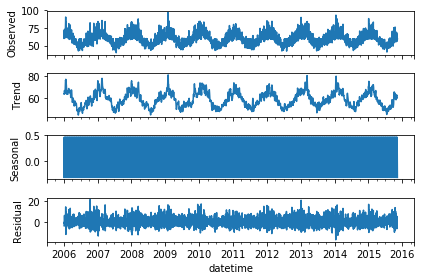

In [50]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Y_train.temp).plot()
result = sm.tsa.stattools.adfuller(Y_train.temp)
plt.show()


In [51]:
#statsmodel usage
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [52]:
#Simple_Smoothing

Y_pred_SSM=Y_test.copy()
Y_pred_SSM.head()
SSM=SimpleExpSmoothing(np.asarray(Y_train['temp'])).fit()
Y_pred_SSM['Smooth']=SSM.forecast(len(Y_pred_SSM))

In [53]:
Y_pred_SSM.head()

,temp,Smooth
datetime,,
2015-11-10,58.0625,59.397525
2015-11-11,57.7500,59.397525
2015-11-12,61.0625,59.397525
2015-11-13,59.7500,59.397525
2015-11-14,58.5625,59.397525


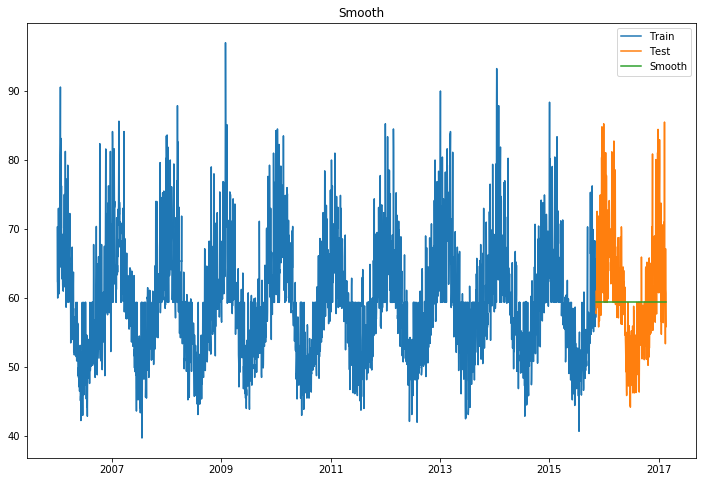

In [54]:
plt.figure(figsize=(12,8))
plt.plot(Y_train.index, Y_train['temp'], label='Train')
plt.plot(Y_test.index,Y_test['temp'], label='Test')
plt.plot(Y_pred_SSM.index,Y_pred_SSM['Smooth'], label='Smooth')
plt.legend(loc='best')
plt.title("Smooth")
plt.show()

In [55]:
rms_SSM = sqrt(mean_squared_error(Y_test.temp, Y_pred_SSM.Smooth))
print(rms_SSM)

8.14458084675


In [56]:
Y_train.head()

,temp
datetime,
2006-01-01,70.250
2006-01-02,62.375
2006-01-03,62.250
2006-01-04,60.000
2006-01-05,62.000


In [57]:
#Holt linear trend

Y_pred_holt = Y_test.copy()

holt = Holt(np.asarray(Y_train['temp'])).fit(smoothing_level = 0.3,smoothing_slope = 0.2)
Y_pred_holt['Holt_linear'] = holt.forecast(len(Y_test))



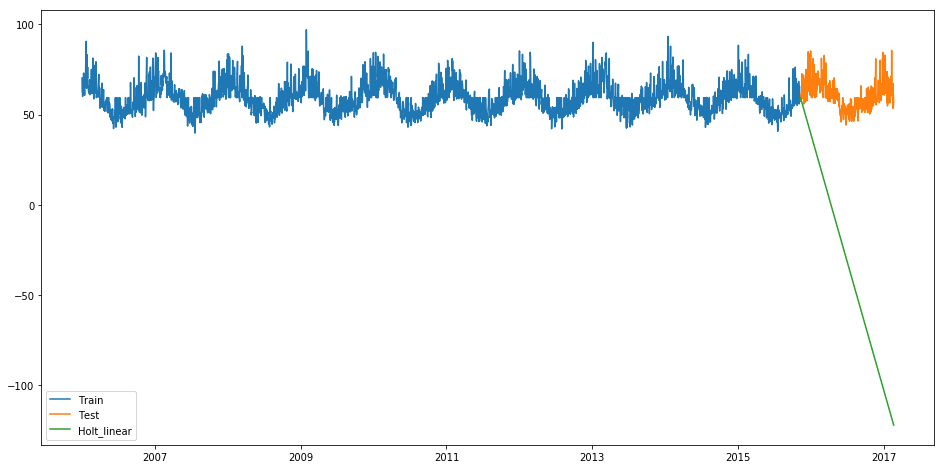

In [58]:
plt.figure(figsize=(16,8))
plt.plot(Y_train['temp'], label='Train')
plt.plot(Y_test['temp'], label='Test')
plt.plot(Y_pred_holt['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [59]:
rms_holt = sqrt(mean_squared_error(Y_test.temp, Y_pred_holt.Holt_linear))
print(rms_holt)

105.551356319


In [60]:
#holt-winter method

Y_pred_winter=Y_test.copy()
exp=ExponentialSmoothing(np.asarray(Y_train['temp']),seasonal_periods=365 ,seasonal='mul',trend='add').fit() 

In [61]:
Y_pred_winter['Holt_Winter'] = exp.forecast(len(Y_test))

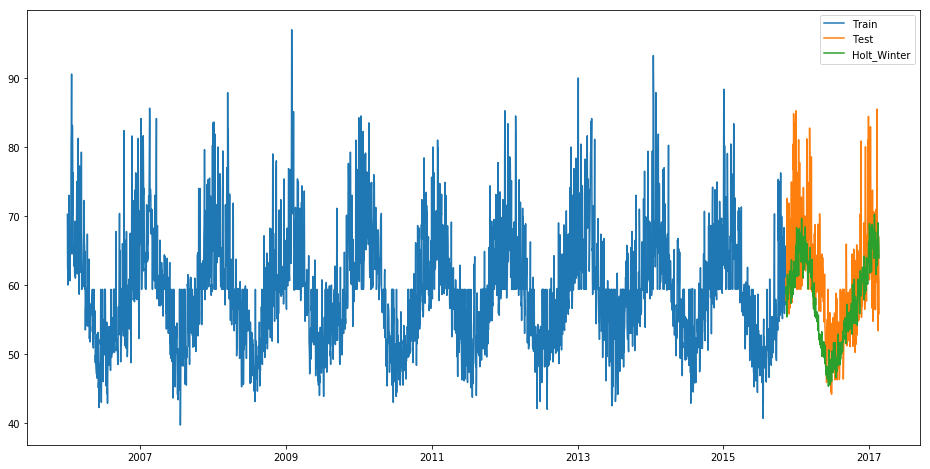

In [62]:
plt.figure(figsize=(16,8))
plt.plot(Y_train['temp'], label='Train')
plt.plot(Y_test['temp'], label='Test')
plt.plot(Y_pred_winter['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [63]:
rms_holt_winter = sqrt(mean_squared_error(Y_test.temp, Y_pred_winter.Holt_Winter))
print(rms_holt_winter)

6.92555055575


# ARIMA model



In [64]:
df.head()

,temp
datetime,
2006-01-01,70.250
2006-01-02,62.375
2006-01-03,62.250
2006-01-04,60.000
2006-01-05,62.000


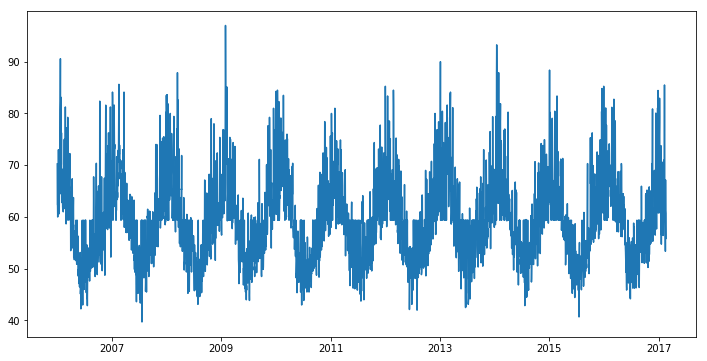

In [65]:
plt.figure(figsize=(12,6))
plt.plot(df)

/home/learnitude/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


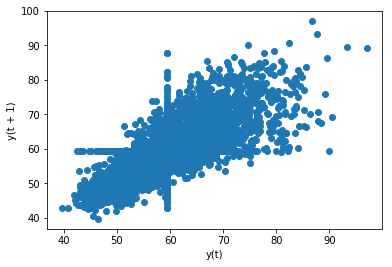

In [66]:
from pandas.tools.plotting import lag_plot
lag_plot(df)

In [67]:
dataframe = pd.concat([df, df.shift()], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)


          t-1       t+1
t-1  1.000000  0.768185
t+1  0.768185  1.000000


/home/learnitude/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


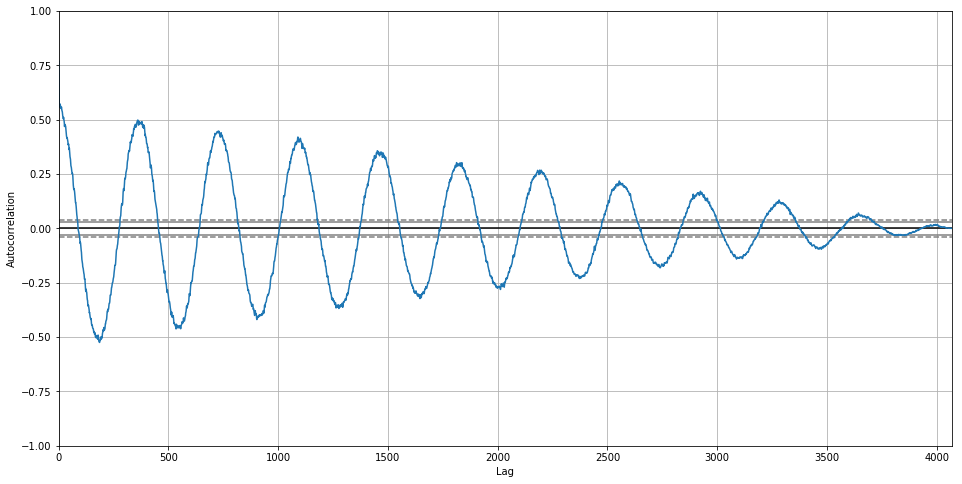

In [68]:
from pandas.tools.plotting import autocorrelation_plot

plt.figure(figsize=(16,8))
autocorrelation_plot(df)
plt.show()

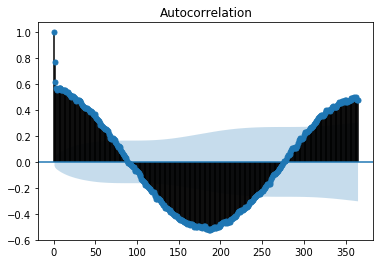

In [69]:

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=365)
plt.show()

In [70]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean=timeseries.rolling(365).mean()
    rolstd = timeseries.rolling(365).std()

    #Plot rolling statistics:
    plt.figure(figsize=(16,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC', regression='c')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput



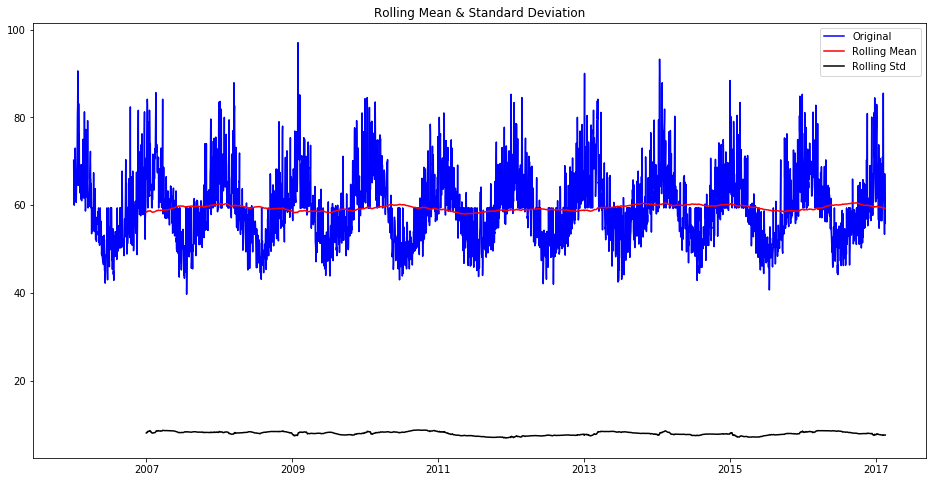

Results of Dickey-Fuller Test:
Test Statistic                   -4.778776
p-value                           0.000060
#Lags Used                       16.000000
Number of Observations Used    4051.000000
Critical Value (5%)              -2.862254
Critical Value (1%)              -3.431965
Critical Value (10%)             -2.567150
dtype: float64


In [71]:
test_stationarity(df['temp'])

In [72]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(df['temp'])

Results of KPSS Test:
Test Statistic            0.039194
p-value                   0.100000
Lags Used                31.000000
Critical Value (5%)       0.463000
Critical Value (1%)       0.739000
Critical Value (2.5%)     0.574000
Critical Value (10%)      0.347000
dtype: float64


/home/learnitude/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


,temp
datetime,
2006-01-01,70.250
2006-01-02,62.375
2006-01-03,62.250
2006-01-04,60.000
2006-01-05,62.000


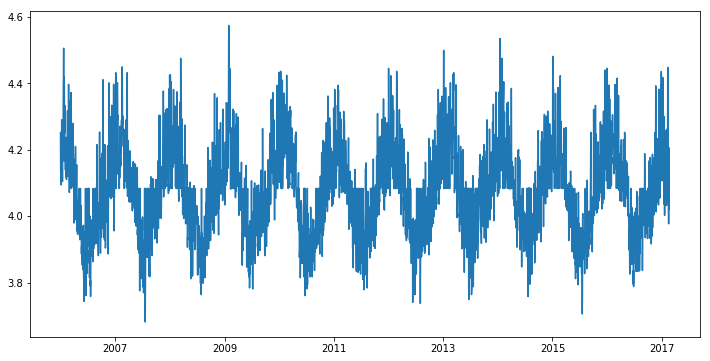

In [73]:
df_log=np.log(df)
plt.figure(figsize=(12,6))
plt.plot(df_log)
df.head()

moving_avg = df_log.rolling(365).mean()
plt.figure(figsize=(16,8))
plt.plot(df_log)
plt.plot(moving_avg, color='red')
df_moving_avg_diff = df_log - moving_avg
df_moving_avg_diff.head()
df_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_moving_avg_diff['temp'])

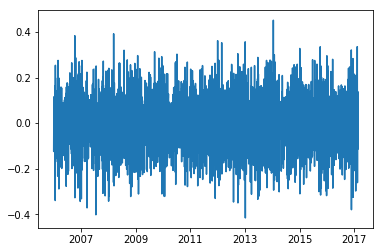

In [74]:
df_diff = df_log - df_log.shift(2)
plt.plot(df_diff)

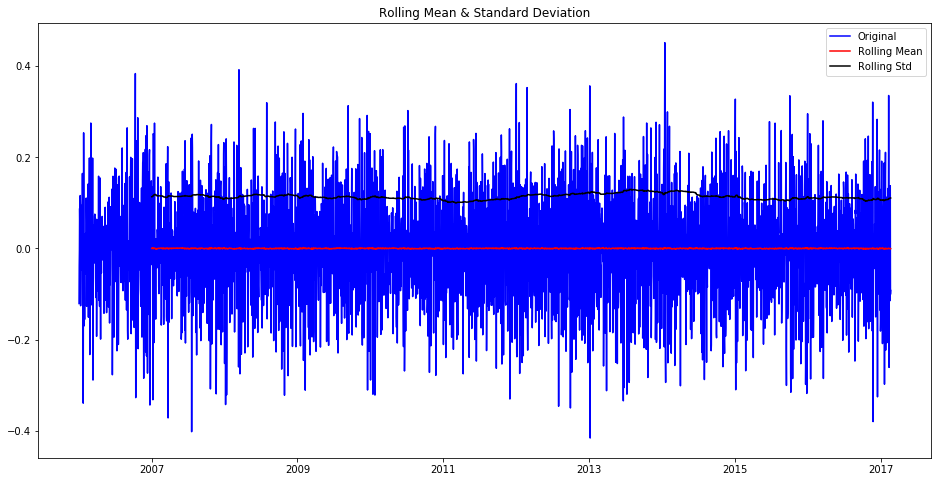

Results of Dickey-Fuller Test:
Test Statistic                -1.420812e+01
p-value                        1.740450e-26
#Lags Used                     3.000000e+01
Number of Observations Used    4.035000e+03
Critical Value (5%)           -2.862257e+00
Critical Value (1%)           -3.431972e+00
Critical Value (10%)          -2.567151e+00
dtype: float64


In [75]:
df_diff.dropna(inplace=True)
test_stationarity(df_diff['temp'])

from statsmodels.tsa.seasonal import seasonal_decompose
defreq=24*60/25*7
decomposition = seasonal_decompose(df_log.temp,freq=defreq, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/home/learnitude/anaconda2/lib/python2.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


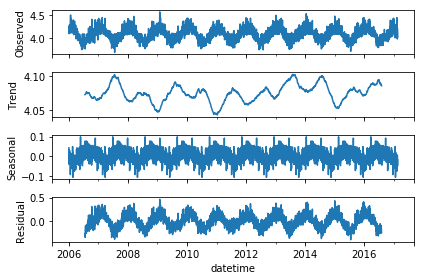

In [76]:
import statsmodels.api as sm
defreq=24*60/25*7
decompose=sm.tsa.seasonal_decompose(df_log.temp,freq=defreq, model='additive')
decompose.plot()
decompose.resid.dropna(inplace=True)

result = sm.tsa.stattools.adfuller(df_log.temp)
plt.show()


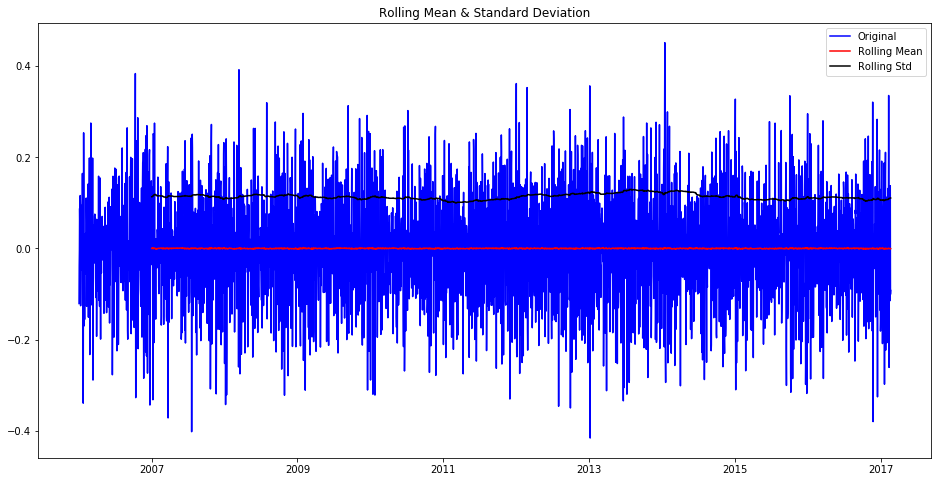

Results of Dickey-Fuller Test:
Test Statistic                -1.420812e+01
p-value                        1.740450e-26
#Lags Used                     3.000000e+01
Number of Observations Used    4.035000e+03
Critical Value (5%)           -2.862257e+00
Critical Value (1%)           -3.431972e+00
Critical Value (10%)          -2.567151e+00
dtype: float64


In [77]:
test_stationarity(df_diff['temp'])

In [78]:
from statsmodels.tsa.stattools import acf,pacf

In [79]:
lag_acf = acf(df_diff)
lag_pacf = pacf(df_diff, method='ols')

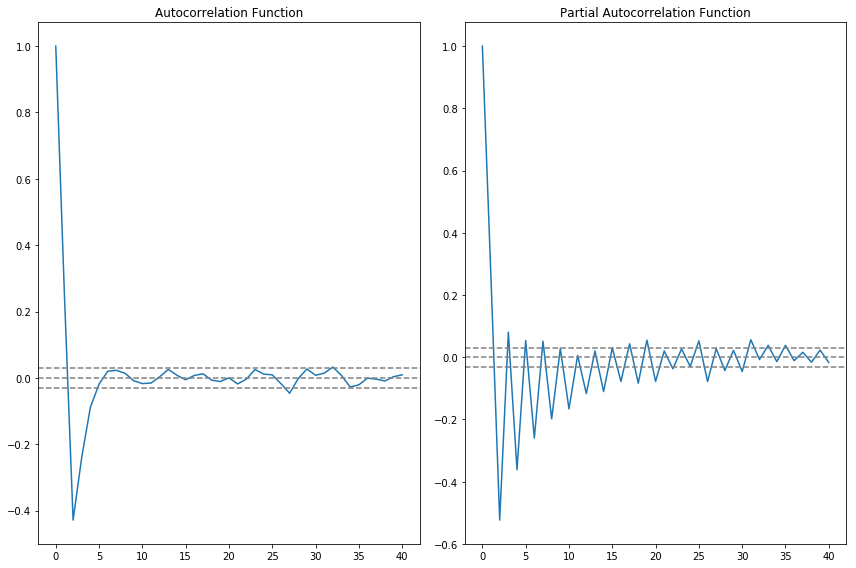

In [80]:
plt.figure(figsize=(12,8))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [81]:
df_diff.head()

,temp
datetime,
2006-01-03,-0.120902
2006-01-04,-0.038820
2006-01-05,-0.004024
2006-01-06,0.087706
2006-01-07,0.047253


In [82]:
from statsmodels.tsa.arima_model import ARIMA

In [83]:
df_diff.head()

,temp
datetime,
2006-01-03,-0.120902
2006-01-04,-0.038820
2006-01-05,-0.004024
2006-01-06,0.087706
2006-01-07,0.047253


Text(0.5,1,'RSS: 28.9585')

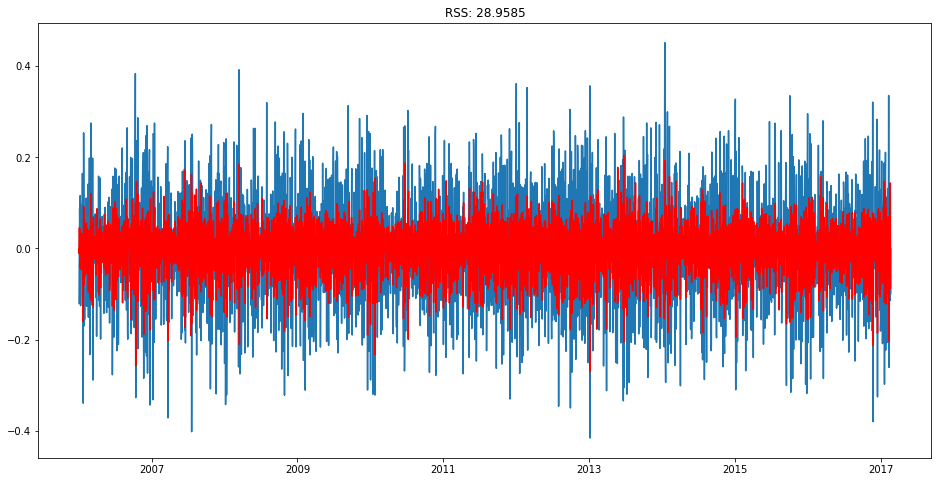

In [134]:
model = ARIMA(df_diff, order=(0, 0, 2))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(16,8))
plt.plot(df_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_diff['temp'])**2))

In [85]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()
df_diff.head()



datetime
2006-01-03   -0.000050
2006-01-04   -0.011616
2006-01-05    0.045120
2006-01-06    0.002009
2006-01-07    0.042284
Freq: D, dtype: float64
datetime
2006-01-03   -0.000050
2006-01-04   -0.011666
2006-01-05    0.033454
2006-01-06    0.035463
2006-01-07    0.077747
Freq: D, dtype: float64


,temp
datetime,
2006-01-03,-0.120902
2006-01-04,-0.038820
2006-01-05,-0.004024
2006-01-06,0.087706
2006-01-07,0.047253


In [86]:
predictions_ARIMA_log = pd.Series(df_log.temp.iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [87]:
df.tail()

,temp
datetime,
2017-02-15,53.375000
2017-02-16,67.153846
2017-02-17,61.250000
2017-02-18,60.714286
2017-02-19,55.857143


In [88]:
predictions_ARIMA.tail()

datetime
2017-02-15    53.850642
2017-02-16    53.404939
2017-02-17    61.654796
2017-02-18    56.420082
2017-02-19    56.366775
Freq: D, dtype: float64

Text(0.5,1,'RMSE: 14.8892')

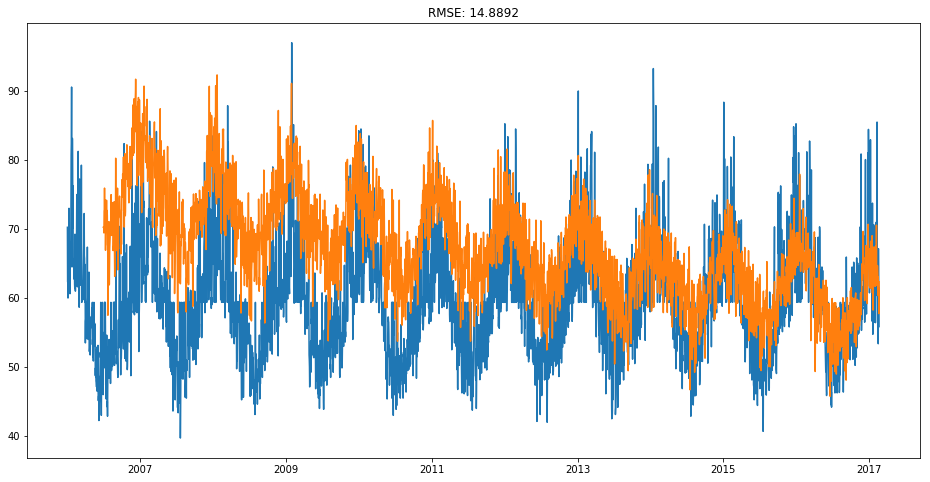

In [89]:
#predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(16,8))
plt.plot(df)

plt.plot(predictions_ARIMA.shift(180))
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df.temp)**2)/len(df.temp)))

# #Train Test Split

In [126]:
train = df_diff['2006-01-01':'2014-11-30']
test = df_diff['2014-12-01':]
new_train=train['temp']
new_test=test['temp']


df['2014-12-01':].head()
test.tail()

,temp
datetime,
2017-02-15,-0.114917
2017-02-16,0.131570
2017-02-17,0.137621
2017-02-18,-0.100807
2017-02-19,-0.092166


In [91]:
new_model = ARIMA(train, order=(0, 0, 2))

In [92]:
new_model_fit=new_model.fit(disp=-1)

Text(0.5,1,'RSS: 23.5180')

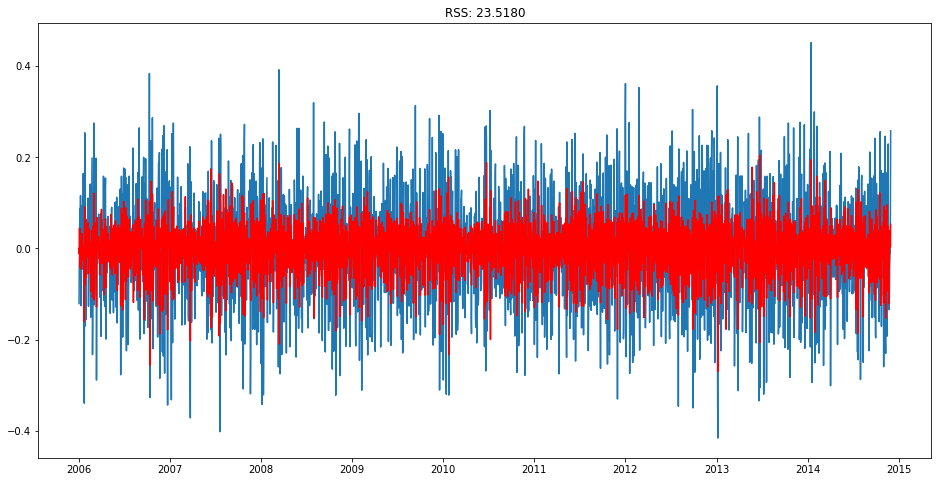

In [93]:
plt.figure(figsize=(16,8))
plt.plot(train)
plt.plot(new_model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((new_model_fit.fittedvalues-train['temp'])**2))

In [94]:
# one-step out of sample forecast

forecast = new_model_fit.predict(start='2014-12-01', end='2017-02-19')
forecast.head(100)

2014-12-01    0.031322
2014-12-02   -0.125024
2014-12-03    0.000006
2014-12-04    0.000006
2014-12-05    0.000006
2014-12-06    0.000006
2014-12-07    0.000006
2014-12-08    0.000006
2014-12-09    0.000006
2014-12-10    0.000006
2014-12-11    0.000006
2014-12-12    0.000006
2014-12-13    0.000006
2014-12-14    0.000006
2014-12-15    0.000006
2014-12-16    0.000006
2014-12-17    0.000006
2014-12-18    0.000006
2014-12-19    0.000006
2014-12-20    0.000006
2014-12-21    0.000006
2014-12-22    0.000006
2014-12-23    0.000006
2014-12-24    0.000006
2014-12-25    0.000006
2014-12-26    0.000006
2014-12-27    0.000006
2014-12-28    0.000006
2014-12-29    0.000006
2014-12-30    0.000006
                ...   
2015-02-09    0.000006
2015-02-10    0.000006
2015-02-11    0.000006
2015-02-12    0.000006
2015-02-13    0.000006
2015-02-14    0.000006
2015-02-15    0.000006
2015-02-16    0.000006
2015-02-17    0.000006
2015-02-18    0.000006
2015-02-19    0.000006
2015-02-20    0.000006
2015-02-21 

Text(0.5,1,'RSS: 9.9765')

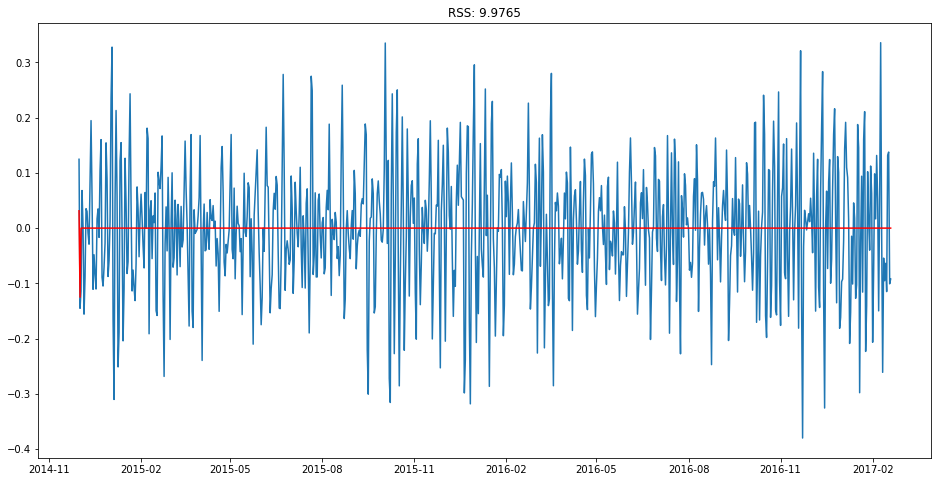

In [95]:
plt.figure(figsize=(16,8))
plt.plot(test)
plt.plot(forecast, color='red')
plt.title('RSS: %.4f'% sum((forecast-test['temp'])**2))

In [114]:
predictions_ARIMA_diff_new = pd.Series(forecast, copy=True)
#print predictions_ARIMA_diff_new.head()
predictions_ARIMA_diff_cumsum_new = predictions_ARIMA_diff_new.cumsum()
#print predictions_ARIMA_diff_cumsum_new.head()

predictions_ARIMA_log_new = pd.Series(df_log['2014-12-01':].temp.iloc[0], index=df_log.index)
predictions_ARIMA_log_new = predictions_ARIMA_log_new.add(predictions_ARIMA_diff_new,fill_value=0)
predictions_ARIMA_log_new.head()
predictions_ARIMA_new = np.exp(predictions_ARIMA_log_new)


In [129]:
predictions_ARIMA_new['2014-12-01':].head()

2014-12-01    74.871305
2014-12-02    64.034661
2014-12-03    72.562962
2014-12-04    72.562962
2014-12-05    72.562962
Freq: D, dtype: float64

In [130]:
df['2014-12-01':].head(10)

,temp
datetime,
2014-12-01,72.562500
2014-12-02,64.812500
2014-12-03,64.750000
2014-12-04,69.375000
2014-12-05,64.875000
2014-12-06,59.373136
2014-12-07,59.312500
2014-12-08,61.500000
2014-12-09,61.125000
